In [70]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import math
import datetime as dt


In [71]:
data = pd.read_csv(r"C:\Users\Trilokesh\Downloads\Datas\MIP.csv")

In [72]:
data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [6]:
data.shape

(1009, 7)

In [7]:
data.index

RangeIndex(start=0, stop=1009, step=1)

In [8]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
data['Date'] = pd.to_datetime(data.Date)

In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [12]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [14]:
data.sort_values(by = 'Date', inplace = True)

In [15]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [16]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 63.1 KB


* This gives the starting date and Ending date

In [18]:
print("Starting date: ",data.iloc[0][0])
print("Ending date: ", data.iloc[-1][0])

Starting date:  2018-02-05 00:00:00
Ending date:  2022-02-04 00:00:00


* This gives the duration(How many days)

In [19]:
Duration = data.iloc[-1][0] - data.iloc[0][0]
Duration

Timedelta('1460 days 00:00:00')

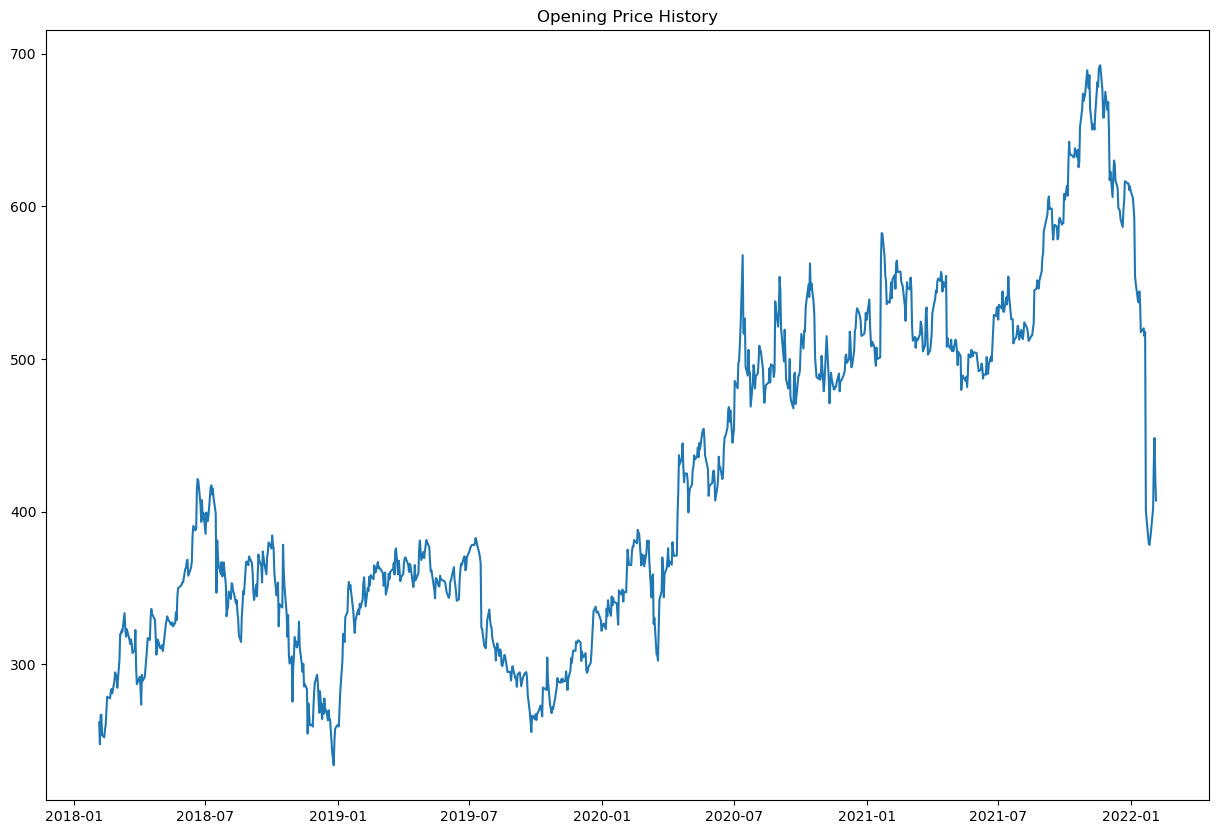

In [20]:
data.index = data['Date']
plt.figure(figsize = (15, 10))
plt.plot(data["Open"])
plt.title("Opening Price History")
plt.show()

* The above graph represents opening price of stocks 

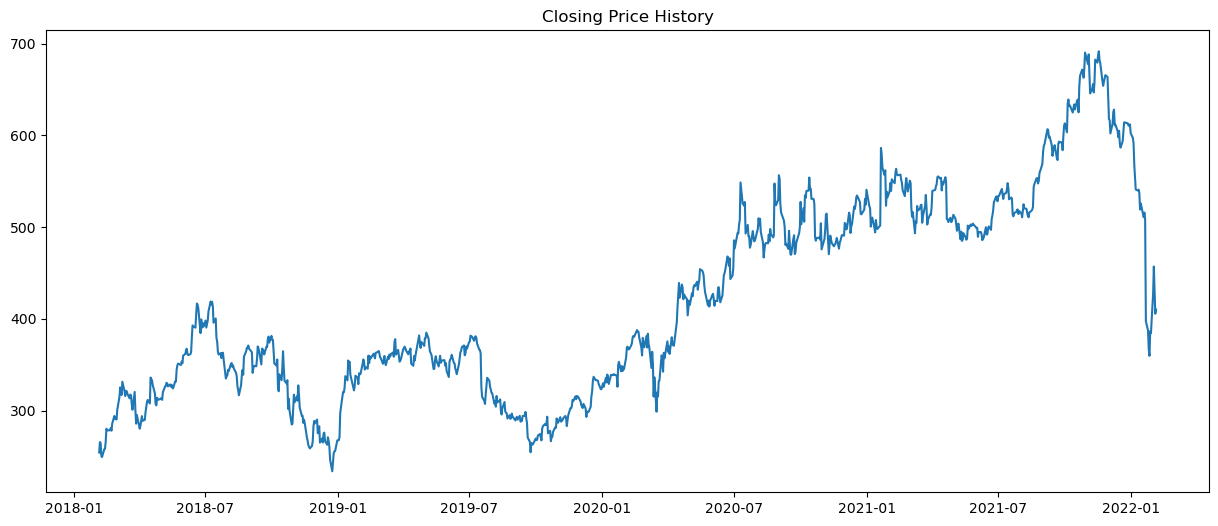

In [21]:
data.index = data['Date']
plt.figure(figsize = (15, 6))
plt.plot(data['Adj Close'])
plt.title("Closing Price History")
plt.show()

* The above graph represents Closing price of stocks 

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

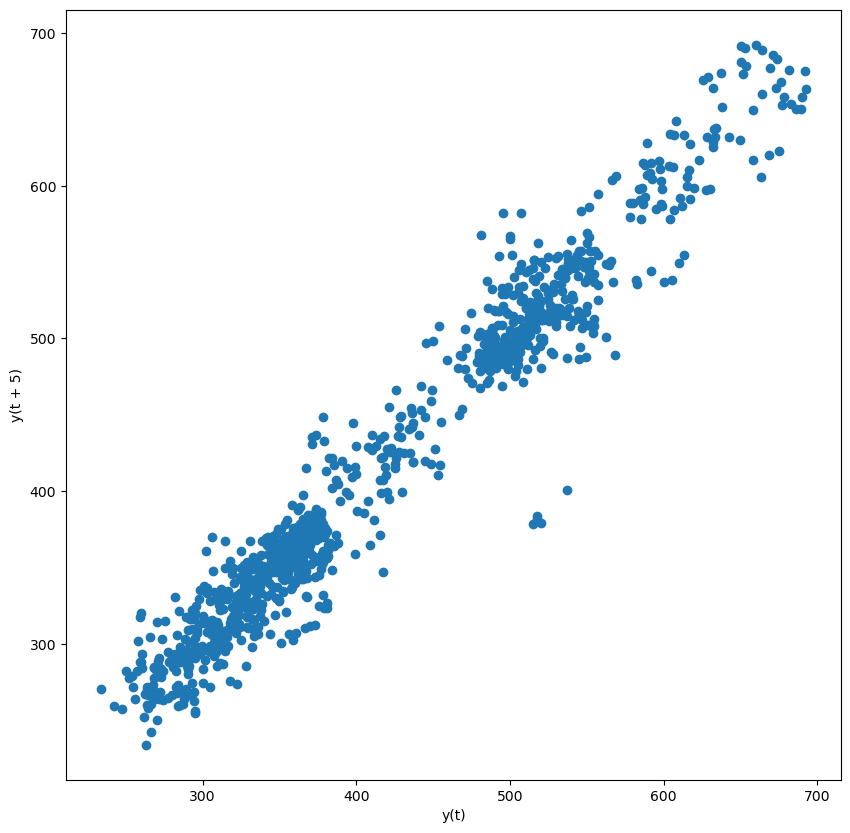

In [22]:
plt.figure(figsize=(10,10))
lag_plot(data['Open'], lag=5)

Text(0.5, 1.0, 'Closing Price History')

<Figure size 1500x600 with 0 Axes>

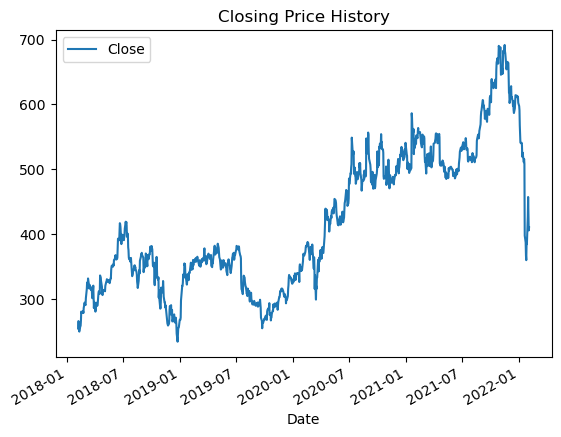

In [23]:
plt.figure(figsize = (15, 6))
data.plot.line(y = 'Close',x = 'Date', use_index = True)
plt.title("Closing Price History")


In [24]:
data["Tomorrow"] = data["Close"].shift(-1)
data

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,,
2018-02-05,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,265.720001
2018-02-06,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,264.559998
2018-02-07,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,250.100006
2018-02-08,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,249.470001
2018-02-09,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,257.950012
...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,457.130005
2022-02-01,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,429.480011
2022-02-02,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,405.600006


In [25]:
data["Target"] = (data["Tomorrow"] > data["Close"]).astype(int)
data

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,,
2018-02-05,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,265.720001,1
2018-02-06,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,264.559998,0
2018-02-07,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,250.100006,0
2018-02-08,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,249.470001,0
2018-02-09,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,257.950012,1
...,...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,457.130005,1
2022-02-01,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,429.480011,0
2022-02-02,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,405.600006,0


In [26]:
data.loc['2021-01-01':].copy()

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,,
2021-01-04,2021-01-04,539.000000,540.799988,515.090027,522.859985,522.859985,4444400,520.799988,0
2021-01-05,2021-01-05,521.549988,526.780029,515.890015,520.799988,520.799988,3133900,500.489990,0
2021-01-06,2021-01-06,511.970001,513.099976,499.500000,500.489990,500.489990,5346200,508.890015,1
2021-01-07,2021-01-07,508.279999,516.440002,506.420013,508.890015,508.890015,3686400,510.399994,1
2021-01-08,2021-01-08,511.309998,513.239990,504.510010,510.399994,510.399994,2973900,499.100006,0
...,...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,457.130005,1
2022-02-01,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,429.480011,0
2022-02-02,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,405.600006,0


In [27]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
training = data.iloc[:-100]
testing = data.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(training[predictors], training["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [28]:
from sklearn.metrics import precision_score
preds = model.predict(testing[predictors])

In [29]:
preds = pd.Series(preds, index = testing.index)

In [30]:
preds.head()

Date
2021-09-15    1
2021-09-16    1
2021-09-17    0
2021-09-20    1
2021-09-21    1
dtype: int32

In [31]:
precision_score(testing["Target"], preds)

0.4117647058823529

In [32]:
combined = pd.concat([testing["Target"], preds], axis = 1)

<Axes: xlabel='Date'>

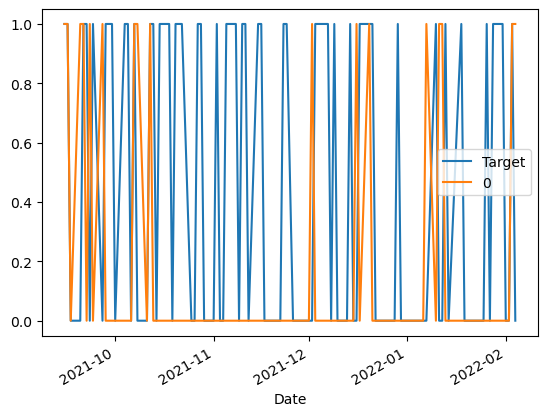

In [33]:
combined.plot()

In [34]:
def predict(training, testing, predictors, model):
    model.fit(training[predictors], training["Target"])
    preds = model.predict(testing[predictors])
    preds = pd.Series(preds, index = testing.index, name = "Predictions")
    combined = pd.concat([testing["Target"], preds], axis = 1)
    return combined


In [35]:
def backtest(dataa, model, predictors, start = 50, step = 2):
    all_predictions = []
    
    for i in range(start, dataa.shape[0], step):
        training = dataa.iloc[0:i].copy()
        testing = dataa.iloc[i:(i+step)].copy()
        predictions = predict(training, testing, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [42]:
predictions = backtest(data, model, predictors)

In [43]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5417515274949084

In [44]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.509906
0    0.490094
Name: Target, dtype: float64

In [45]:
horizons = [2,5,60,250,1000]
new_predictors = []
for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

C:\Users\Trilokesh\AppData\Local\Temp\ipykernel_11372\135659011.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_averages = data.rolling(horizon).mean()
C:\Users\Trilokesh\AppData\Local\Temp\ipykernel_11372\135659011.py:10: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  data[trend_column] = data.shift(1).rolling(horizon).sum()["Target"]


In [46]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
2018-02-05,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,265.720001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-06,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,264.559998,0,1.022039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-07,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,250.100006,0,0.997812,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-08,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,249.470001,0,0.971904,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-09,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,257.950012,1,0.998739,0.0,0.971373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,457.130005,1,1.052717,1.0,1.109847,2.0,0.729851,22.0,0.769390,132.0,1.017520,513.0
2022-02-01,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,429.480011,0,1.033915,2.0,1.134301,3.0,0.785823,23.0,0.823974,132.0,1.088445,513.0
2022-02-02,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,405.600006,0,0.968814,1.0,1.030022,3.0,0.742894,23.0,0.774813,132.0,1.022193,512.0


In [47]:
data = data.dropna()

In [49]:
predictions["Predictions"].value_counts()

1    491
0    468
Name: Predictions, dtype: int64

In [50]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5417515274949084

In [51]:
print("training_data: ", training.shape)

training_data:  (909, 9)


In [52]:
print("testing_data: ",testing.shape)

testing_data:  (100, 9)
